Problem Statement:

The diabetes dataset involves predicting the onset of diabetes within 5 years, given the medical details.
It is a binary classification problem 

- Class 1: Diabetes will show up within next 5 years
- Class 0: Diabetes will not show up within next 5 years

The number of observations for each class is not balanced.

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [2]:
# Load the data
df = pd.read_csv("Diabetes.csv")

In [3]:
df.head()

,No. of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [7]:
# Check the number of NaN values in each column
df.isnull().sum(axis = 0)

No. of times pregnant                             0
Plasma glucose concentration                      0
Diastolic blood pressure (mm Hg)                  0
Triceps skin fold thickness (mm)                  0
2-Hour serum insulin (mu U/ml)                    0
Body mass index (weight in kg/(height in m)^2)    0
Diabetes pedigree function                        0
Age (years)                                       0
Class variable (0 or 1)                           0
dtype: int64

In [15]:
df.describe()

,No. of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
# Difference between mean and median in the features
df.mean()- df.median()

No. of times pregnant                              0.845052
Plasma glucose concentration                       3.894531
Diastolic blood pressure (mm Hg)                  -2.894531
Triceps skin fold thickness (mm)                  -2.463542
2-Hour serum insulin (mu U/ml)                    49.299479
Body mass index (weight in kg/(height in m)^2)    -0.007422
Diabetes pedigree function                         0.099376
Age (years)                                        4.240885
Class variable (0 or 1)                            0.348958
dtype: float64

### Visualize the feature relationship

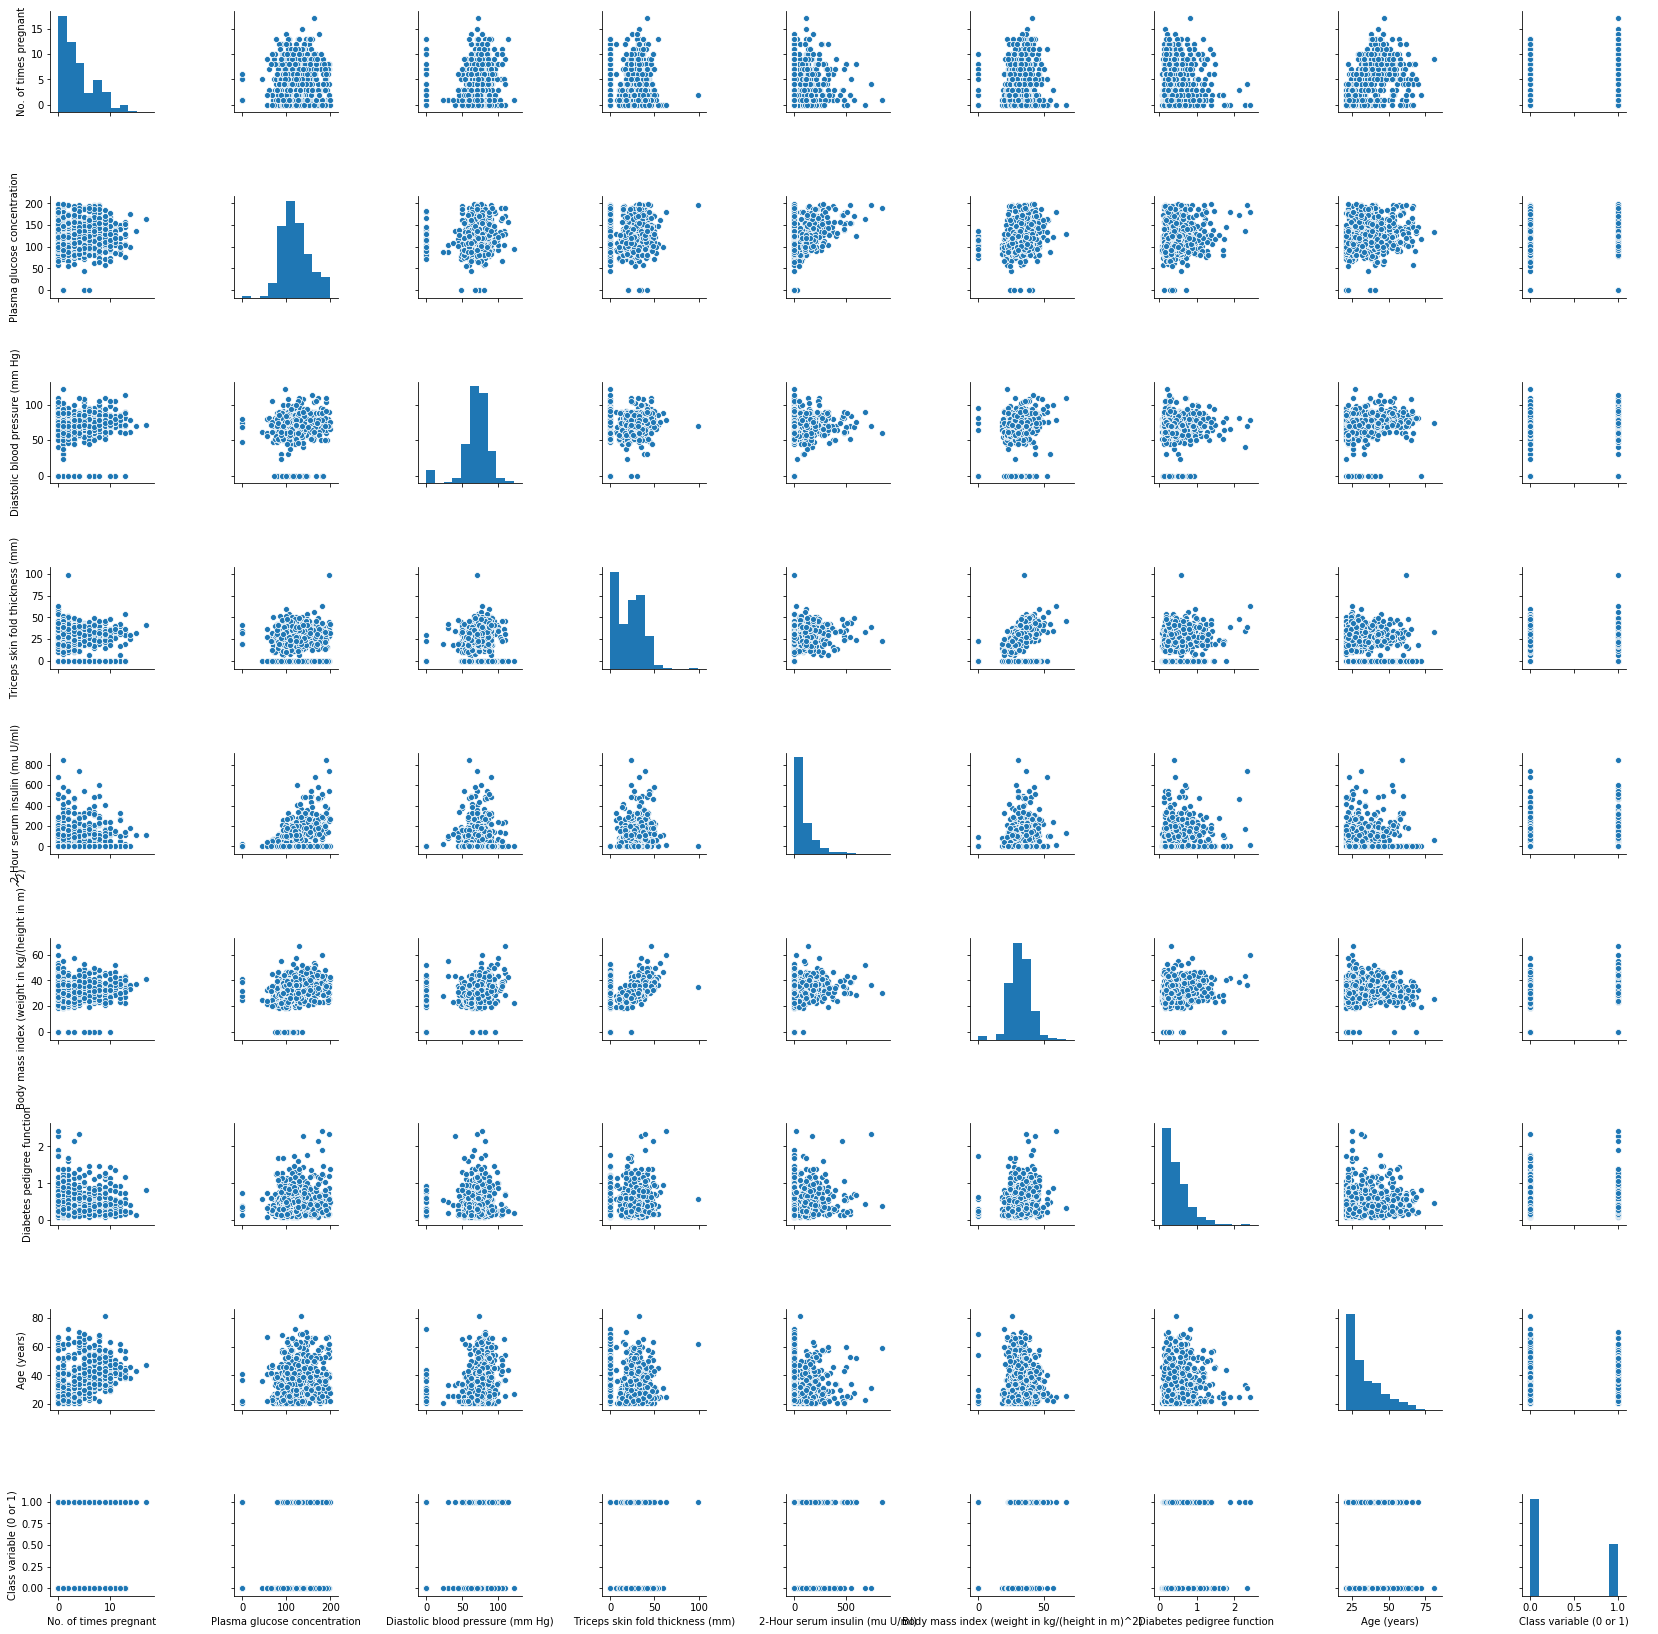

In [22]:
# Pairwise Plot
sns.pairplot(df)

In [20]:
# Heatmap
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,No. of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
No. of times pregnant,1,0.13,0.14,-0.082,-0.074,0.018,-0.034,0.54,0.22
Plasma glucose concentration,0.13,1,0.15,0.057,0.33,0.22,0.14,0.26,0.47
Diastolic blood pressure (mm Hg),0.14,0.15,1,0.21,0.089,0.28,0.041,0.24,0.065
Triceps skin fold thickness (mm),-0.082,0.057,0.21,1,0.44,0.39,0.18,-0.11,0.075
2-Hour serum insulin (mu U/ml),-0.074,0.33,0.089,0.44,1,0.2,0.19,-0.042,0.13
Body mass index (weight in kg/(height in m)^2),0.018,0.22,0.28,0.39,0.2,1,0.14,0.036,0.29
Diabetes pedigree function,-0.034,0.14,0.041,0.18,0.19,0.14,1,0.034,0.17
Age (years),0.54,0.26,0.24,-0.11,-0.042,0.036,0.034,1,0.24
Class variable (0 or 1),0.22,0.47,0.065,0.075,0.13,0.29,0.17,0.24,1


### Split the Data

In [27]:
# Divide into features and target
target = df["Class variable (0 or 1)"]
features = df.drop("Class variable (0 or 1)", axis=1)

In [33]:
# Split the data into train and test with equal ratio of class 0 and 1
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2, stratify=target)

print ("Train features shape", X_train.shape)
print ("Train target shape", y_train.shape)
print ("Test features shape", X_test.shape)
print ("Test features shape", y_test.shape)

Train features shape (614, 8)
Train target shape (614,)
Test features shape (154, 8)
Test features shape (154,)


In [43]:
print ("ratio of class 0 and 1 in training data", round(y_train.value_counts()[1]/y_train.count(), 3))
print ("ratio of class 0 and 1 in testing data", round(y_test.value_counts()[1]/y_test.count(),3))

ratio of class 0 and 1 in training data 0.349
ratio of class 0 and 1 in testing data 0.351


### Implement the SVM Model

In [50]:
# Implement the SVM model with scaled features
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [55]:
# Predict the test data
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0
 0 1 1 0 0 0]


### Evaluation

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[91,  9],
       [24, 30]])

In [57]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
tn, fp, fn, tp

(91, 9, 24, 30)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0,1]))

             precision    recall  f1-score   support

          0       0.79      0.91      0.85       100
          1       0.77      0.56      0.65        54

avg / total       0.78      0.79      0.78       154



In [60]:
print (pd.crosstab(y_test, y_pred))

col_0                     0   1
Class variable (0 or 1)        
0                        91   9
1                        24  30
